# Working with Projections

This section of the tutorial discusses [map projections](https://en.wikipedia.org/wiki/Map_projection). If you don't know what a projection is, or are looking to learn more about how they work in `geoplot`, this page is for you!

I recommend reading this notebook using [NBViewer](https://nbviewer.jupyter.org/github/ResidentMario/geoplot/blob/master/notebooks/tutorials/Working_with_Projections.ipynb) or, better yet, following along interactively using [Binder](https://mybinder.org/v2/gh/ResidentMario/geoplot/master?filepath=notebooks/tutorials/Working_with_Projections.ipynb).

## Projection and unprojection

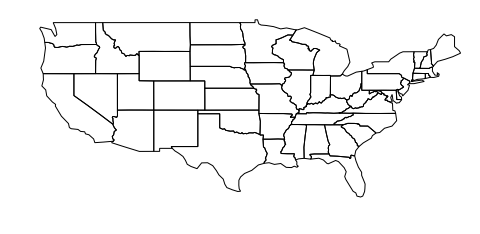

In [1]:
import geopandas as gpd
import geoplot as gplt
%matplotlib inline

# load the example data
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.polyplot(contiguous_usa)

This map is an example of an unprojected plot: it reproduces our coordinates as if they were on a flat Cartesian plane. But remember, the Earth is not a flat surface; it's a sphere. This isn't a map of the United States that you'd seen in print anywhere because it badly distorts both of the [two criteria](http://www.geo.hunter.cuny.edu/~jochen/gtech201/lectures/lec6concepts/Map%20coordinate%20systems/How%20to%20choose%20a%20projection.htm) most projections are evaluated on: *shape* and *area*. 

For sufficiently small areas, the amount of distortion is very small. This map of New York City, for example, is reasonably accurate:

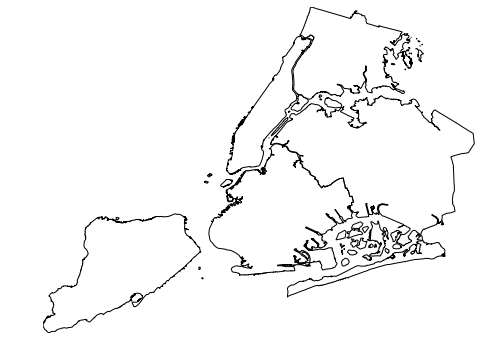

In [2]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
gplt.polyplot(boroughs)

But there is a better way: use a **projection**.

A projection is a way of mapping points on the surface of the Earth into two dimensions (like a piece of paper or a computer screen). Because moving from three dimensions to two is intrinsically lossy, no projection is perfect, but some will definitely work better in certain case than others.

The most common projection used for the contiguous United States is the [Albers Equal Area projection](https://en.wikipedia.org/wiki/Albers_projection). This projection works by wrapping the Earth around a cone, one that's particularly well optimized for locations near the middle of the Northern Hemisphere (and particularly poorly for locations at the poles).

To add a projection to a map in `geoplot`, pass a `geoplot.crs` object to the `projection` parameter on the plot. For instance, here's what we get when we try `Albers` out on the contiguous United States:

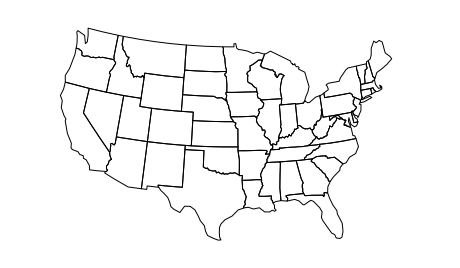

In [3]:
import geoplot.crs as gcrs
gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())

For a list of projections implemented in `geoplot`, refer to [the projections reference](http://scitools.org.uk/cartopy/docs/latest/crs/projections.html) in the `cartopy` documentation (`cartopy` is the library `geoplot` relies on for its projections).

## Stacking projected plots

A key feature of `geoplot` is the ability to stack plots on top of one another.

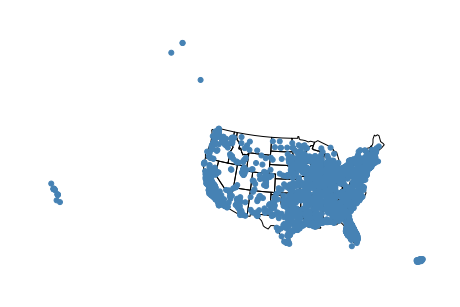

In [4]:
cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
ax = gplt.polyplot(
    contiguous_usa, 
    projection=gcrs.AlbersEqualArea()
)
gplt.pointplot(cities, ax=ax)

By default, `geoplot` will set the [`extent`](https://nbviewer.jupyter.org/github/ResidentMario/geoplot/blob/master/notebooks/tutorials/Customizing%20Plots.ipynb#Extent) (the area covered by the plot) to the [`total_bounds`](http://geopandas.org/reference.html#geopandas.GeoSeries.total_bounds) of the last plot stacked onto the map.

However, suppose that even though we have data for One entire United States (plus Puerto Rico) we actually want to display just data for the contiguous United States. An easy way to get this is setting the `extent` parameter using `total_bounds`.

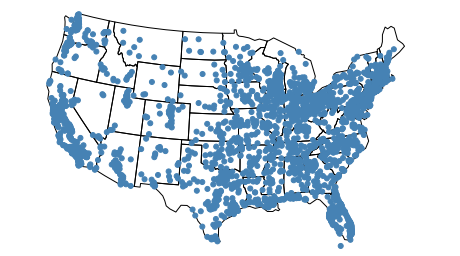

In [5]:
ax = gplt.polyplot(
    contiguous_usa, 
    projection=gcrs.AlbersEqualArea()
)
gplt.pointplot(cities, ax=ax, extent=contiguous_usa.total_bounds)

The section of the tutorial on [Customizing Plots](https://nbviewer.jupyter.org/github/ResidentMario/geoplot/blob/master/notebooks/tutorials/Customizing%20Plots.ipynb#Extent) explains the `extent` parameter in more detail.

## Projections on subplots

It is possible to compose multiple axes together into a single panel figure in `matplotlib` using the `subplots` feature. This feature is highly useful for creating side-by-side comparisons of your plots, or for stacking your plots together into a single more informative display.

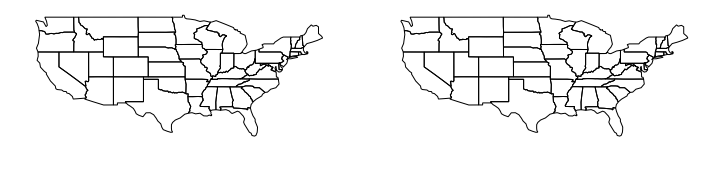

In [6]:
import matplotlib.pyplot as plt
import geoplot as gplt

f, axarr = plt.subplots(1, 2, figsize=(12, 4))
gplt.polyplot(contiguous_usa, ax=axarr[0])
gplt.polyplot(contiguous_usa, ax=axarr[1])

`matplotlib` supports subplotting projected maps using the `projection` argument to `subplot_kw`.

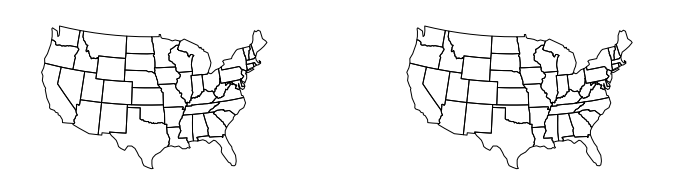

In [7]:
proj = gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)
f, axarr = plt.subplots(1, 2, figsize=(12, 4), subplot_kw={
    'projection': proj
})
gplt.polyplot(contiguous_usa, projection=proj, ax=axarr[0])
gplt.polyplot(contiguous_usa, projection=proj, ax=axarr[1])

The [Gallery](https://residentmario.github.io/geoplot/gallery.html) includes several demos, like the [Pointplot Scale Functions](https://residentmario.github.io/geoplot/examples/usa-city-elevations.html) demo, that use this feature to good effect.

Notice that in this code sample we specified some additional parameters for our projection. The `central_longitude=-98` and `central_latitude=39.5` parameters set the "center point" around which the points and shapes on the map are reprojected (in this case we use the [geographic center of the contiguous United States](https://en.wikipedia.org/wiki/Geographic_center_of_the_contiguous_United_States)).

When you pass a projection to a `geoplot` function, `geoplot` will infer these values for you. But when passing the projection directly to `matplotlib` you must set them yourself.